### Ploting the data got from the Labview based IV measurement setup.

The program reads the data and the information from .dat and .txt file respectively and plots graph with it.

The program below is the working model of the project without use of function.

/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv/
/home/pankaj/s_meet/python_practice/function_python/labview_plot/data_iv/20210621_1_QT6__UV__ON__137mA__50_Ohm__LOG.txt


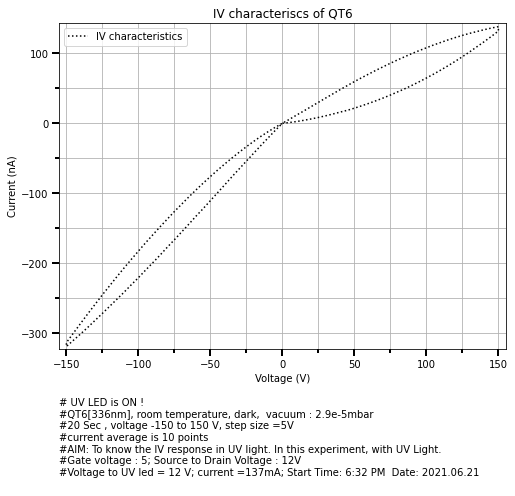

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import walk
import os
import math
from matplotlib.ticker import AutoMinorLocator
import fnmatch
##----------------------------------------------------
## Program to read data.
dir_location = os.getcwd() # To get the current working directory.
#dir_location = os.path.dirname(__file__) #Not working in Jupyter-notbook (website: urle.me/cY1)

location = os.path.join(dir_location, 'data_iv/') #joining the current working directory to a new folder "data_iv"
print(location)
for (dirpath, _, filenames) in walk(location):
    for filename in filenames:
        if fnmatch.fnmatch(filename,'2021*.dat'):
            location_and_data = location + filename
        if fnmatch.fnmatch(filename,'*.txt'):
            location_and_information = location + filename
            print(location_and_information)

data = pd.read_table(location_and_data)
data = pd.DataFrame(data).drop([0])
data =data.astype(float)

information_file = open(location_and_information)
lines = information_file.readlines()

###---------------------------------------------------
## Program to get the condition of the experiment from the LOG file.
information = ''
count = 0
for line in lines:

    if "#$" in line:
        count +=1
    if count % 2 != 0:
        if "#$" in line :
            continue
        else:
            information += line
###----------------------------------------------------

#    print(pd.DataFrame(data))
##-----------------------------------------------------

#print(data.columns) # To know the name of the columns

total_x_axis = (data['S1C1'].append(data['S2C1'])).append(data['S3C1'])
total_y_axis = (data['S1C2'].append(data['S2C2'])).append(data['S3C2'])
current_unit = 1e-9 #Selecting the current unit.

###---------------------------------------
### For ploting
left, width = 0.0, 0.0
bottom, height = -0.15, 0.0

fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("IV characteriscs of QT6")
ax.plot(total_x_axis, total_y_axis/current_unit, 'k:',label="IV characteristics",)
ax.grid(which='both')
#ax.set_xlabel('Voltage (V)\n\n'+information)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (nA)')
#ax.text(left,bottom,information)

ax.text(left, bottom, information, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

ax.set_ylim(math.floor(min(data['S2C2'])/current_unit)-5,math.ceil(max(data['S2C2'])/current_unit)+5)
ax.set_xlim((min(data['S2C1'])-5),5+(max(data['S2C1'])))
ax.legend()

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')

plt.show()
###---------------------------------------



### Rough


The data_iv directory contains following contents:
 ['20210621_1_QT6__UV__ON__137mA__50_Ohm_.dat', '20210621_1_QT6__UV__ON__137mA__50_Ohm__LOG.txt']

Enter the name of the file containing data : 

Enter the name of the file containing information : 


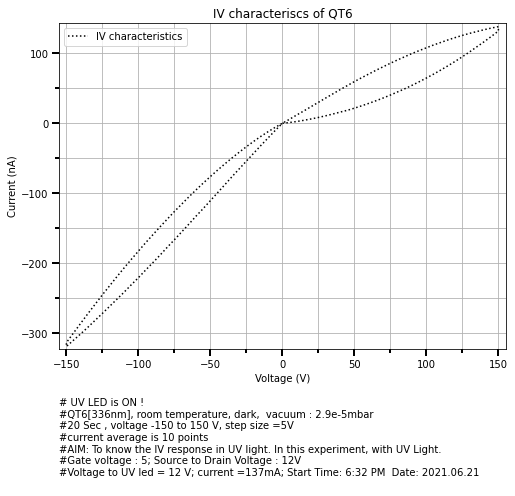

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import walk
import os
import math
from matplotlib.ticker import AutoMinorLocator
import fnmatch
##----------------------------------------------------
## Program to read data.
dir_location = os.getcwd() # To get the current working directory.
#dir_location = os.path.dirname(__file__) #Not working in Jupyter-notbook (website: urle.me/cY1)

location = os.path.join(dir_location, 'data_iv/') #joining the current working directory to a new folder "data_iv"
print("The data_iv directory contains following contents:\n",os.listdir(location))
data_name = input("\nEnter the name of the file containing data : ")
data_name = data_name if data_name != "" else "*.dat"
information_name = input("\nEnter the name of the file containing information : ")
information_name = information_name if information_name != "" else "*.txt"
for (dirpath, _, filenames) in walk(location):
    for filename in filenames:
        if fnmatch.fnmatch(filename, data_name):
            location_and_data = location + filename
        if fnmatch.fnmatch(filename, information_name):
            location_and_information = location + filename

###---------------------------------------------------------------------            

## Using  the location with name obtain from above program

data = pd.read_table(location_and_data)
data = pd.DataFrame(data).drop([0])
data =data.astype(float)

information_file = open(location_and_information)
lines = information_file.readlines()


###---------------------------------------------------

## Program to get the condition of the experiment from the LOG file.
information = ''
count = 0
for line in lines:

    if "#$" in line:
        count +=1
    if count % 2 != 0:
        if "#$" in line :
            continue
        else:
            information += line
###----------------------------------------------------

#    print(pd.DataFrame(data))
##-----------------------------------------------------

#print(data.columns) # To know the name of the columns

total_x_axis = (data['S1C1'].append(data['S2C1'])).append(data['S3C1'])
total_y_axis = (data['S1C2'].append(data['S2C2'])).append(data['S3C2'])
###---------------------------------------


### For ploting

current_unit = 1e-9 #Selecting the current unit.

left, width = 0.0, 0.0
bottom, height = -0.15, 0.0

fig, ax = plt.subplots(figsize=(8,6))

ax.set_title("IV characteriscs of QT6")
ax.plot(total_x_axis, total_y_axis/current_unit, 'k:',label="IV characteristics",)
ax.grid(which='both')
#ax.set_xlabel('Voltage (V)\n\n'+information)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (nA)')
#ax.text(left,bottom,information)

ax.text(left, bottom, information, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

ax.set_ylim(math.floor(min(data['S2C2'])/current_unit)-5,math.ceil(max(data['S2C2'])/current_unit)+5)
ax.set_xlim((min(data['S2C1'])-5),5+(max(data['S2C1'])))
ax.legend()

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')

plt.show()
###---------------------------------------



### Remaking the above file using function to read file, take parameters for legends, current(nA or pA; keeping default nA if nothing is passed)

List of inputs:

Enter the name of the file containing data : 
Enter the name of the file containing information : 
Enter the current input (i.e., 1e-9 for nA) : 
Enter the title of the plot : 

1. Name of the file to read for data.
2. Name of the file to read information.
1. Title of the plot
3. nA or pA

~~2. legends~~

### Working model using function.

The data_iv directory contains following contents:
 ['20210621_1_QT6__UV__ON__137mA__50_Ohm_.dat', '20210621_1_QT6__UV__ON__137mA__50_Ohm_.png', '20210621_1_QT6__UV__ON__137mA__50_Ohm__LOG.txt']

Enter the name of the file containing data : 

Enter the name of the file containing information : 
Enter the current input (i.e., 1e-9 for nA) : 
Enter the title of the plot : 


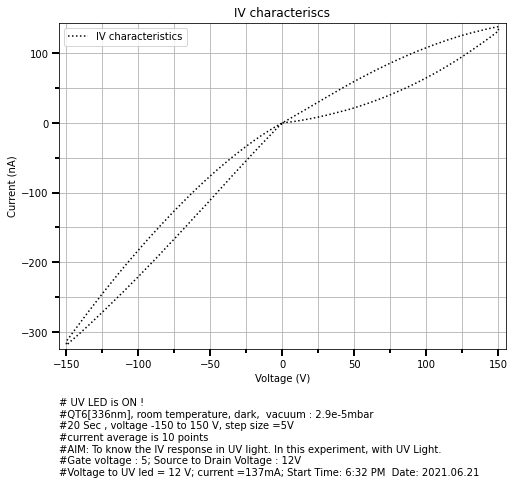

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import walk
import os
import math
from matplotlib.ticker import AutoMinorLocator
import fnmatch


def read_file():
    '''
    This function will take input from the user [e.g. name (half name*) of the file 
    containing data ('.dat') to read, name (half name*) of the file containing 
    parameters and various condition in which data is taken from '.txt' both files 
    are stored in the 'data_iv' subdirectory].
    
    User input: 'data_name' , 'information_name'
    Output: 'location_and_data', location_and_information, data_file_name
    '''
    
    #data_name = ''
    #information_name = ''
    ## Program to read data.
    dir_location = os.getcwd() # To get the current working directory.
    #dir_location = os.path.dirname(__file__) #Not working in Jupyter-notbook (website: urle.me/cY1)

    location = os.path.join(dir_location, 'data_iv/') #joining the current working directory to a new folder "data_iv"
    print("The data_iv directory contains following contents:\n",os.listdir(location))
    data_name = input("\nEnter the name of the file containing data : ") #data_name : contains name of .dat file.
    data_name = data_name if data_name != "" else "*.dat"
    
    information_name = input("\nEnter the name of the file containing information : ") #information_name : contains name of .txt file.
    information_name = information_name if information_name != "" else "*.txt"
         
    for (dirpath, _, filenames) in walk(location):
        for filename in filenames:
            if fnmatch.fnmatch(filename, data_name):
                location_and_data = location + filename
                data_file_name = filename.split('.')[0]
                
            if fnmatch.fnmatch(filename, information_name):
                location_and_information = location + filename
    
    return(location_and_data, location_and_information, data_file_name)

def read_content_of_file(location_and_data, location_and_information ,data_file_name):
    '''
    This function will take data file name with location and generate the data for the plotter function.
    
    Input: location_and_data, location_and_information, data_file_name
    Output: total_x_axis, total_y_axis, information, data_file_name
    '''
    ## Using  the location with name obtain from above program
    ## Reading the data from the '*.dat' file.
    
    data = pd.read_table(location_and_data) 
    
    data = pd.DataFrame(data).drop([0])     # The first row contains units i.e., string. 
                                            # Not involve in plotting and calculation 
                                            #[generates error while floating conversion].
    
    data = data.astype(float)               # Converting the data into float type.
    
    #print(pd.DataFrame(data))
    
    ##----------------------------------------------
    ## Program to get the condition of the experiment from the '*__LOG.txt' file.
    
    information_file = open(location_and_information)
    lines = information_file.readlines()
    
    information = ''
    count = 0                              # If count (i.e., '#$') is odd read from '.txt' file.
                                           # This means the message/information is written between two '#$'.
    for line in lines:

        if "#$" in line:
            count +=1
        if count % 2 != 0:
            if "#$" in line :
                continue
            else:
                information += line
    ##-----------------------------------------------------

    #print(data.columns) # To know the name of the columns

    total_x_axis = (data['S1C1'].append(data['S2C1'])).append(data['S3C1'])
    total_y_axis = (data['S1C2'].append(data['S2C2'])).append(data['S3C2'])
    return(total_x_axis, total_y_axis, information, data_file_name)

def plotter(total_x_axis, total_y_axis, data_file_name, information = '' ):
    '''
    This program plots the figure based on the data received.
    
    Input: total_x_axis, data_file_name, total_y_axis, information = ''
    User input: current_unit, Title of the plot.
    Output: graph
    '''
    ### For ploting
    
    ##---------------------------
    ## Program for selecting the unit of the current in y axis. The default unit is 'nA'.
    current_unit = input('Enter the current input (i.e., 1e-9 for nA) : ')
    current_unit = 1e-9 if current_unit == '' else current_unit #if nothing is given it will take 'nA' i.e., 1e-9
    current_unit = float(current_unit)
    ##---------------------------
    ## Program for taking the 'Title of the plot'
    title_plot = input('Enter the title of the plot : ')
    title_plot = 'IV characteriscs' if title_plot == '' else title_plot #if nothing is given it will take 'IV characteriscs'
    ##---------------------------
    left, width = 0.0, 0.0                # For setting the 'text/information' location
    bottom, height = -0.15, 0.0           # in the figure.
    ##---------------------------
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(title_plot)
    ax.plot(total_x_axis, total_y_axis/current_unit, 'k:',label="IV characteristics",)
    ax.grid(which='both')
    #ax.set_xlabel('Voltage (V)\n\n'+information)
    ax.set_xlabel('Voltage (V)')
    ax.set_ylabel('Current (nA)')
    #ax.text(left,bottom,information)

    ax.text(left, bottom, information, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

    ax.set_ylim(math.floor(min(total_y_axis)/current_unit)-5,math.ceil(max(total_y_axis)/current_unit)+5)
    ax.set_xlim((min(total_x_axis)-5),5+(max(total_x_axis)))
    ax.legend()

    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4, color='k')
    #plt.savefig(,bbox_inches='tight',transparent=False)
    plt.savefig('./data_iv/'+data_file_name+'.png', dpi=None, facecolor='w', edgecolor='w',orientation='portrait', format=None,transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)
    plt.show()
    
    ###---------------------------------------
if __name__ == '__main__':
    location_and_data, location_and_information, data_file_name = read_file()
    total_x_axis, total_y_axis,data_file_name, information = read_content_of_file(location_and_data, location_and_information, data_file_name)
    plotter(total_x_axis, total_y_axis, information, data_file_name)